In [1]:
import h5py

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import numpy as np

from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic_2d

with h5py.File('../../data/posteriors_DESY3_arico.hdf5', 'r') as f:
     S8_data = f['S8'][:]
     Om_data = f['omega_matter'][:]
     sigma8_data = S8_data * np.sqrt(.3/Om_data)

N = 100
is_highres = True
n_om = N
n_s8 = N
n_gamma = N

nbins = 100

if is_highres:
    om_min = 0.250
    om_max = 0.5
    s8_min = 0.5
    s8_max = 1.05
    gamma_min = 0
    gamma_max = 1.2
    FOLDER = "highres"
else:
    om_min = .05
    om_max = 1
    s8_min = 0.4
    s8_max = 1.2
    gamma_min = -0.5
    gamma_max = 2
    FOLDER = "lowres"

omega_vals = np.asarray(np.linspace(om_min, om_max, n_om))
sigma_vals = np.asarray(np.linspace(s8_min, s8_max, n_s8))
gamma_vals = np.asarray(np.linspace(gamma_min, gamma_max, n_gamma))

In [23]:
# Résultats du fit :
# Chi2 = 1734.07 

# Paramètres estimés :
# Ωm = 0.218 ± 0.0001
# rd = 147.000 ± 1.4700
# H0 = 74.072 ± 0.115

# Chi2 = 1715.14 

# Paramètres estimés :
# Ωm = 0.217 ± 0.0068
# rd = 147.000 ± 1.4700
# H0 = 74.097 ± 0.170

print(omega_vals-0.315)
np.argmin(abs(omega_vals-0.315))

[-0.065      -0.06247475 -0.05994949 -0.05742424 -0.05489899 -0.05237374
 -0.04984848 -0.04732323 -0.04479798 -0.04227273 -0.03974747 -0.03722222
 -0.03469697 -0.03217172 -0.02964646 -0.02712121 -0.02459596 -0.02207071
 -0.01954545 -0.0170202  -0.01449495 -0.0119697  -0.00944444 -0.00691919
 -0.00439394 -0.00186869  0.00065657  0.00318182  0.00570707  0.00823232
  0.01075758  0.01328283  0.01580808  0.01833333  0.02085859  0.02338384
  0.02590909  0.02843434  0.0309596   0.03348485  0.0360101   0.03853535
  0.04106061  0.04358586  0.04611111  0.04863636  0.05116162  0.05368687
  0.05621212  0.05873737  0.06126263  0.06378788  0.06631313  0.06883838
  0.07136364  0.07388889  0.07641414  0.07893939  0.08146465  0.0839899
  0.08651515  0.0890404   0.09156566  0.09409091  0.09661616  0.09914141
  0.10166667  0.10419192  0.10671717  0.10924242  0.11176768  0.11429293
  0.11681818  0.11934343  0.12186869  0.12439394  0.12691919  0.12944444
  0.1319697   0.13449495  0.1370202   0.13954545  0.

26

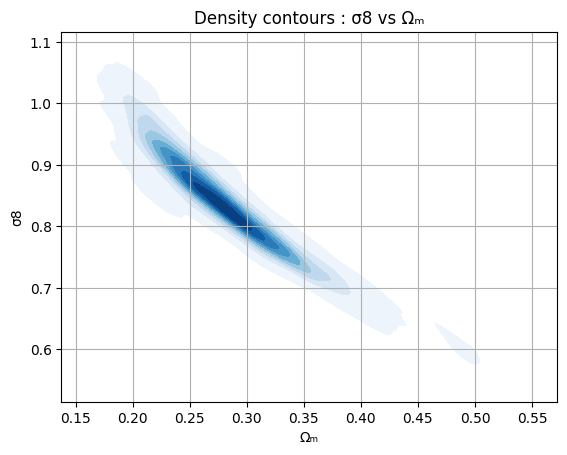

In [6]:
sns.kdeplot(x=Om_data, y=sigma8_data,
             fill=True, levels=10, cmap="Blues", thresh=0.01)

plt.xlabel("Ωₘ")
plt.ylabel("σ8")
plt.title("Density contours : σ8 vs Ωₘ")
plt.grid(True)
plt.show()

In [4]:
H, xedges, yedges = np.histogram2d(Om_data, sigma8_data, bins=nbins, range=[[om_min, om_max], [s8_min, s8_max]], density=True)
H = H.T

P = H / np.max(H)
with np.errstate(divide='ignore'):
    delta_chi2_grid_raw = -2 * np.log(P)
    delta_chi2_grid_raw[np.isinf(delta_chi2_grid_raw)] = np.nanmax(delta_chi2_grid_raw) + 1  # pour éviter les inf

In [2]:
X, Y = np.meshgrid(omega_vals, sigma_vals)
positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([Om_data, sigma8_data])
kde = gaussian_kde(values)
density = kde(positions).reshape(X.shape)

P = density / np.max(density)
with np.errstate(divide='ignore'):
    delta_chi2_grid = -2 * np.log(P)
    delta_chi2_grid[np.isinf(delta_chi2_grid)] = np.nanmax(delta_chi2_grid) + 1

In [9]:
np.savez("../../output/1-chi2_DESY3/" + FOLDER + "/chi2_DESY3_arico.npz", grid=delta_chi2_grid)

<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2902/937820486.py:31: SyntaxWarning: invalid escape sequence '\D'
  display_one_chi2(delta_chi2_grid, ax[1], "Smooth $\Delta \chi^2$ contours")
/tmp/ipykernel_2902/937820486.py:32: SyntaxWarning: invalid escape sequence '\D'
  display_one_chi2(delta_chi2_grid_raw, ax[0], "Raw $\Delta \chi^2$ contours")


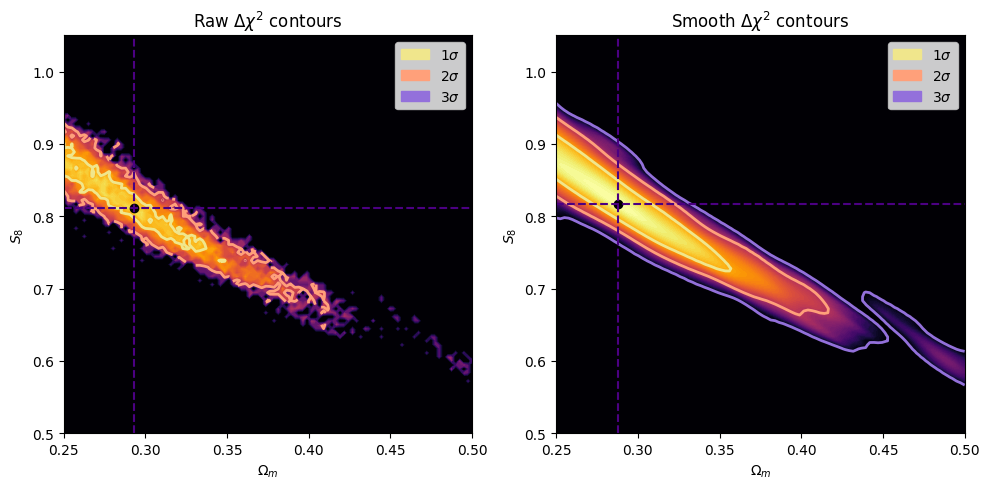

In [5]:
def display_one_chi2(chi2_grid, ax, title):
    levels = [2.3, 6.17, 11.8]
    colors = ['khaki', 'lightsalmon', 'mediumpurple']

    delta_chi2_clipped = np.clip(chi2_grid, a_min=None, a_max=levels[2])
    cf = ax.contourf(omega_vals, sigma_vals, delta_chi2_clipped, levels=100, cmap='inferno_r')

    for level, color in zip(levels, colors):
        cs = ax.contour(omega_vals, sigma_vals, chi2_grid, levels=[level], colors=[color], linewidths=2)

    legend_handles = [
        Patch(color='khaki', label=r'$1\sigma$'),
        Patch(color='lightsalmon', label=r'$2\sigma$'),
        Patch(color='mediumpurple', label=r'$3\sigma$')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    min_idx = np.unravel_index(np.nanargmin(chi2_grid), chi2_grid.shape)
    x_min = omega_vals[min_idx[1]]
    y_min = sigma_vals[min_idx[0]]
    ax.plot(x_min, y_min, 'ko', label='Best-fit')
    ax.axhline(y_min, color='indigo', linestyle='--')
    ax.axvline(x_min, color='indigo', linestyle='--')

    ax.set_xlabel(r"$\Omega_m$")
    ax.set_ylabel(r"$\sigma_8$")
    ax.set_title(title)
    ax.set_facecolor('black')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
display_one_chi2(delta_chi2_grid, ax[1], "Smooth $\Delta \chi^2$ contours")
display_one_chi2(delta_chi2_grid_raw, ax[0], "Raw $\Delta \chi^2$ contours")
plt.tight_layout()
plt.show()